In [1]:
from pybedtools import BedTool
import pandas as pd
import numpy as np
from scipy.stats import chisquare

import os
from pathlib import Path
import sys
data_dir = Path('/home/hsher/projects/oligo_results/Final_published_figures')
sys.path.append(str(data_dir))

from plot_params import *


# load all splicing data
regions_dict = {}
for group in ['in', 'ex', 'ctrl']:
    regions = []
    # (ce, ue, de, fiu, fid)
    for region in ['casette', 'exon5', 'exon3', 'intron5_to_casette', 'intron3_to_casette']:
    
        bedfile = BedTool(data_dir/f'data/rbfox2_splicing_data/HEK293T.{group}.{region}.bed')
        
        regions_dict[group, region] = bedfile

In [2]:
# find peaks
basedir = Path('/home/hsher/scratch/ABC_2rep/beta-mixture_CC/finemapping/mapped_sites/CITS')
basedir2 = Path('/home/hsher/scratch/ABC_2rep/DMM/finemapping/mapped_sites/CITS')


In [3]:
peak = BedTool(basedir/'HEK293_rep1.RBFOX2.finemapped_windows.bed.gz')

In [4]:
peak2 = BedTool(basedir2/'HEK293_rep1.RBFOX2.finemapped_windows.bed.gz')

In [5]:
data = []
for peak_file in basedir.glob("HEK*RBFOX2*.bed.gz"):
    peak = BedTool(peak_file)
    print(peak_file)
    libname = peak_file.name.split('.')[0]
    
    for key in regions_dict:
        region_bed = regions_dict[key]
        group, region = key
        
        n_region_has_peak = len(region_bed.intersect(peak, s = True, F = 0.5, u = True))
        n_region_no_peak = len(region_bed.intersect(peak, s = True, F = 0.5, v = True))
        
        data.append([libname, group, region, n_region_has_peak, n_region_no_peak])
data = pd.DataFrame(data, columns = ['libname', 'group', 'region', 'bound', 'not_bound'])

/home/hsher/scratch/ABC_2rep/beta-mixture_CC/finemapping/mapped_sites/CITS/HEK293_rep1.RBFOX2.finemapped_windows.bed.gz
/home/hsher/scratch/ABC_2rep/beta-mixture_CC/finemapping/mapped_sites/CITS/HEK293_rep2.RBFOX2.finemapped_windows.bed.gz


dmm_data

In [6]:
dmm_data = []
for peak_file in basedir2.glob("HEK*RBFOX2*.bed.gz"):
    peak = BedTool(peak_file)
    print(peak_file)
    libname = peak_file.name.split('.')[0]
    
    for key in regions_dict:
        region_bed = regions_dict[key]
        group, region = key
        
        n_region_has_peak = len(region_bed.intersect(peak, s = True, F = 0.5, u = True))
        n_region_no_peak = len(region_bed.intersect(peak, s = True, F = 0.5, v = True))
        
        dmm_data.append([libname, group, region, n_region_has_peak, n_region_no_peak])
dmm_data = pd.DataFrame(dmm_data, columns = ['libname', 'group', 'region', 'bound', 'not_bound'])

/home/hsher/scratch/ABC_2rep/DMM/finemapping/mapped_sites/CITS/HEK293_rep1.RBFOX2.finemapped_windows.bed.gz
/home/hsher/scratch/ABC_2rep/DMM/finemapping/mapped_sites/CITS/HEK293_rep2.RBFOX2.finemapped_windows.bed.gz


In [7]:
clipper_data = []
clipper_files = Path('/projects/ps-yeolab5/ABC_chisq_peaks/').glob('Dan_multiplex1_HEK*/*RBFOX2*compressed.bed')
for peak_file in clipper_files:
    peak = BedTool(peak_file).filter(lambda x: float(x[3])>3 and float(x[4])>3).saveas()
    libname = str(peak_file).split('/')[-2].replace('Dan_multiplex1_', '')
    
    for key in regions_dict:
        region_bed = regions_dict[key]
        group, region = key
        
        n_region_has_peak = len(region_bed.intersect(peak, s = True, F = 0.5, u = True))
        n_region_no_peak = len(region_bed.intersect(peak, s = True, F = 0.5, v = True))
        
        clipper_data.append([libname, group, region, n_region_has_peak, n_region_no_peak])
clipper_data = pd.DataFrame(clipper_data, columns = ['libname', 'group', 'region', 'bound', 'not_bound'])

In [8]:
col = ['libname', 'group', 'region']
all_counts = clipper_data.merge(data, left_on = col, right_on = col, suffixes = ('_clipper', '_beta-binom_mixture'))
all_counts = all_counts.merge(dmm_data, left_on = col, right_on = col)
all_counts.rename({'bound':'bound_dmm', 'not_bound':'not_bound_dmm'}, axis = 1, inplace = True)

In [9]:
all_counts.head()

,libname,group,region,bound_clipper,not_bound_clipper,bound_beta-binom_mixture,not_bound_beta-binom_mixture,bound_dmm,not_bound_dmm
0,HEK293_rep2,in,casette,6,144,3,147,4,146
1,HEK293_rep2,in,exon5,1,149,2,148,5,145
2,HEK293_rep2,in,exon3,2,148,4,146,5,145
3,HEK293_rep2,in,intron5_to_casette,5,141,11,135,14,132
4,HEK293_rep2,in,intron3_to_casette,3,143,5,141,5,141


In [10]:
reg_order = ['exon5', 'intron5_to_casette', 'casette', 'intron3_to_casette', 'exon3']

/scratch/hsher/33888137.tscc-mgr7.local/ipykernel_33892/942692119.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.groupby(by = ['region']).mean(
/scratch/hsher/33888137.tscc-mgr7.local/ipykernel_33892/942692119.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group.groupby(by = ['region']).mean(
/scratch/hsher/33888137.tscc-mgr7.local/ipykernel_33892/942692119.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the funct

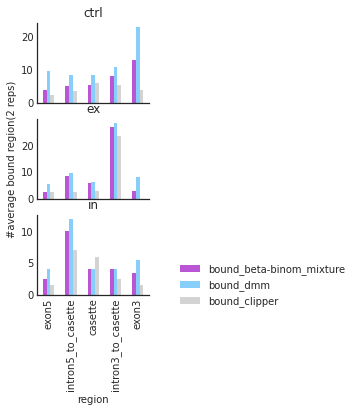

In [11]:
f, ax = plt.subplots(3,1, figsize =(2,5), sharey = False, sharex = True)
i = 0
for name, group in all_counts.groupby(by = 'group'):
    group.groupby(by = ['region']).mean(
    ).loc[reg_order, ['bound_beta-binom_mixture', 'bound_dmm', 'bound_clipper']].plot.bar(
        ax = ax[i], legend = False, color = ['mediumorchid', 'lightskyblue', 'lightgrey']
    )
    ax[i].set_title(name)
    if i == 1:
        ax[i].set_ylabel('#average bound region(2 reps)')
    i+=1
sns.despine()
ax[i-1].legend(bbox_to_anchor = (1.2, 0.5))
plt.tight_layout()
plt.savefig(figdir/'RBFOX2_splicing_number.pdf')

In [12]:
from scipy.stats import fisher_exact
from scipy.stats import chisquare
from statsmodels.stats.multitest import fdrcorrection
def counts_to_stat(data):
    stats = []
    pseudocount = 1
    for name, group in data.groupby(by = ['libname', 'region']):
        
        ctrl = group.loc[group['group']=='ctrl', ['bound', 'not_bound']].values
        
        for direction in ['in', 'ex']:
            change = group.loc[group['group']==direction, ['bound', 'not_bound']].values


            pv = np.concatenate([change, ctrl], axis = 0)
            if np.any(pv<=5):
                odds_ratio, pval = fisher_exact(pv+pseudocount, alternative = 'greater')
            else:
                chi, pval = chisquare(change[0], ctrl[0]/(ctrl[0].sum()/change[0].sum()))
                odds_ratio = (change[0,0]/change[0,1])/(ctrl[0,0]/ctrl[0,1])

                

            stats.append([name[0], name[1], direction, odds_ratio, pval])
    stats = pd.DataFrame(stats, columns = ['libname', 'region', 'direction', 'odds', 'pval'])
    _, stats['FDR'] = fdrcorrection(stats['pval'])
    stats['asterstick'] = stats['FDR'].apply(lambda p: '***' if p<1e-10
                                                       else '**' if p<0.001 else
                                                      '*' if p<0.05 else '')
    return stats

In [13]:
clipper_stat = counts_to_stat(clipper_data)
stripper_stat = counts_to_stat(data)
dmm_stat = counts_to_stat(dmm_data)

In [14]:
clipper_stat['method'] = 'clipper'
stripper_stat['method'] = 'Beta-binom Mixture'
dmm_stat['method'] = 'Dirichlet-multinomial Mixture'

In [15]:
stats = pd.concat([clipper_stat, stripper_stat, dmm_stat])

/scratch/hsher/33888137.tscc-mgr7.local/ipykernel_33892/300115429.py:4: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for name, group in stats.groupby(by = ['direction']):


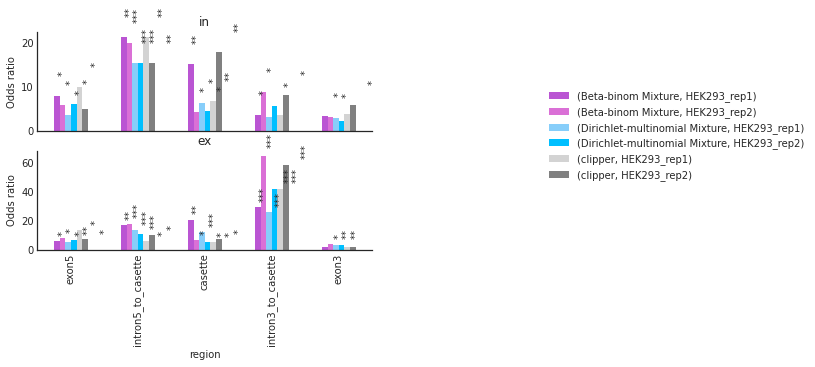

In [16]:

f, ax = plt.subplots(2,1, sharex = True, sharey = False)
ax = ax.flatten(order = 'F')[::-1]
i = 0
for name, group in stats.groupby(by = ['direction']):
    group.set_index('region', inplace = True)
    group = group.loc[reg_order]
    #group.loc[reg_order, 'odds'].plot.bar(ax = ax[i])
    pv = pd.pivot_table(group, columns = 'region', index = ['method', 'libname'], values = 'odds').T
    pv.loc[reg_order].plot.bar(
    color = ['mediumorchid', 'orchid', 'lightskyblue', 'deepskyblue', 'lightgrey', 'grey'], ax = ax[i], legend = False)
    
    aster = pd.pivot_table(group, columns = 'region', index = ['method', 'libname'], values = 'asterstick', aggfunc = lambda x:x).T
    for x, reg in enumerate(reg_order):
        odds = pv.loc[reg]
        ast = aster.loc[reg]
        for yi, y in enumerate(odds):
            
            ax[i].text(x-0.2+yi/8, max(y*1.1, y+5), ast[yi],rotation = 'vertical')
    ax[i].set_title(name)
    ax[i].set_ylabel('Odds ratio')
    i += 1
ax[i-1].legend(bbox_to_anchor = (1.5,0.5))

sns.despine()
plt.savefig(figdir/'RBFOX2_splicing_odds.pdf')